In [635]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

In [636]:
Nx = 64
Ny = 1
Nz = 64
case = 'output_swe_vortex'
# case = 'output_swe_dvortex'
dvortex = 'dvortex' in case
if dvortex:
    et = 72.0 * 3.0 #* 1200.0
else:
    et = 3.0

def load(Nx,Ny,et):
    base_fn = case
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

# Substeps plotter

0.0
ic p2_nodes:  6.5078224e-18 -0.016156867 0.016156867
mean =  -0.0018896095
1.0
after_full_step p2_nodes:  0.0018846743 -0.01473895 0.016623624
mean =  -0.00021223725
1.5
after_full_step p2_nodes:  0.0019464114 -0.014592286 0.016538698
mean =  -0.0003970231


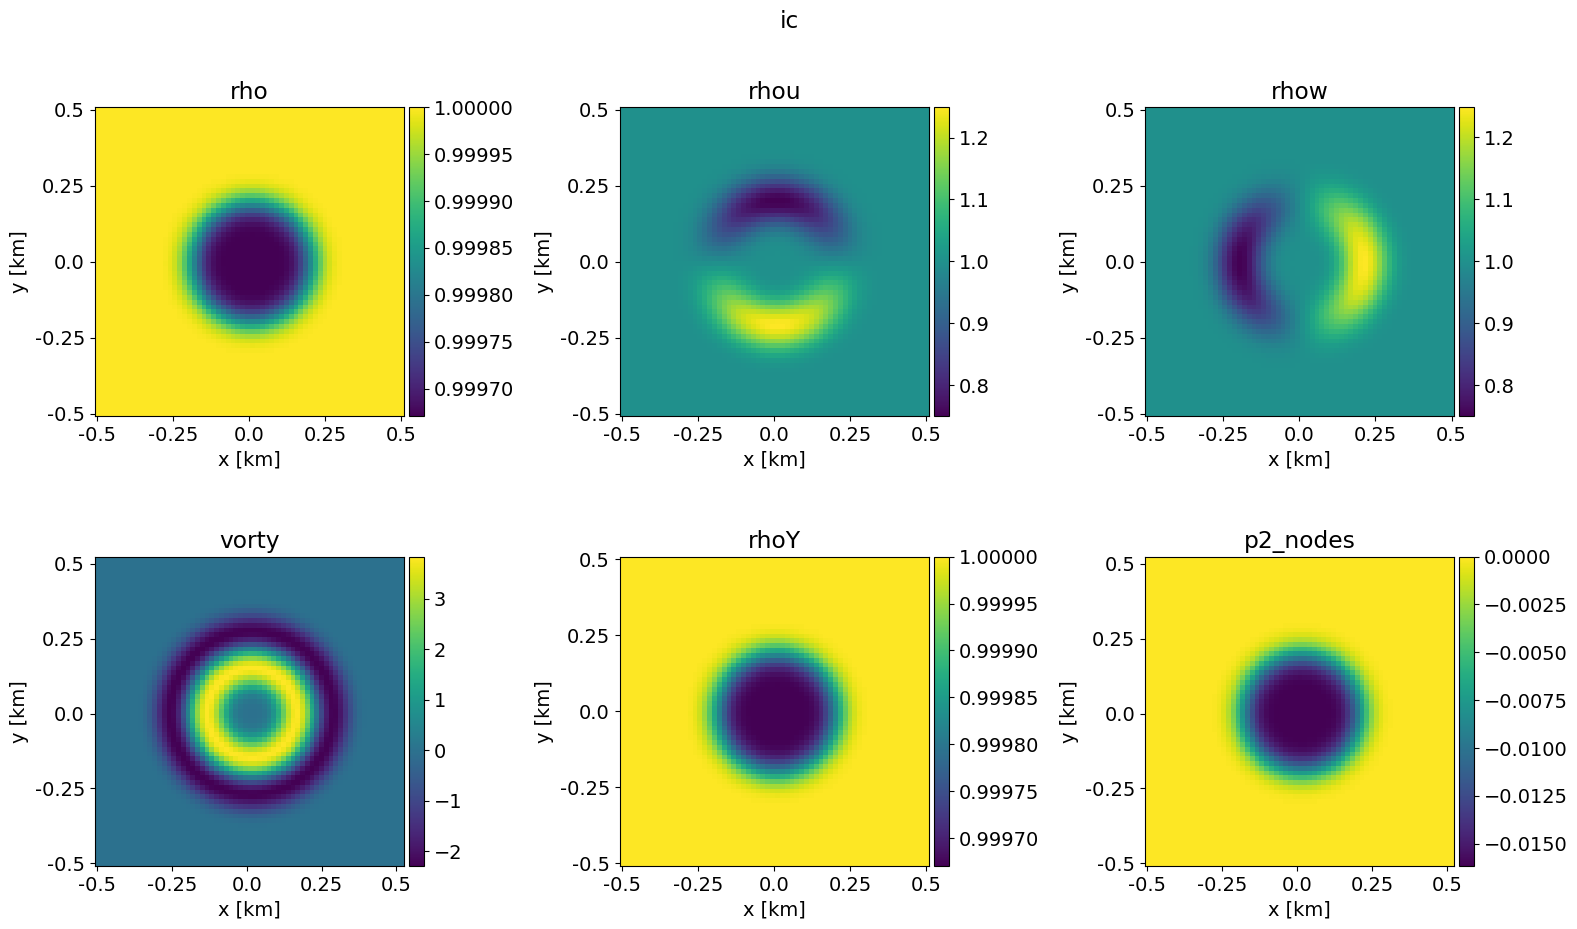

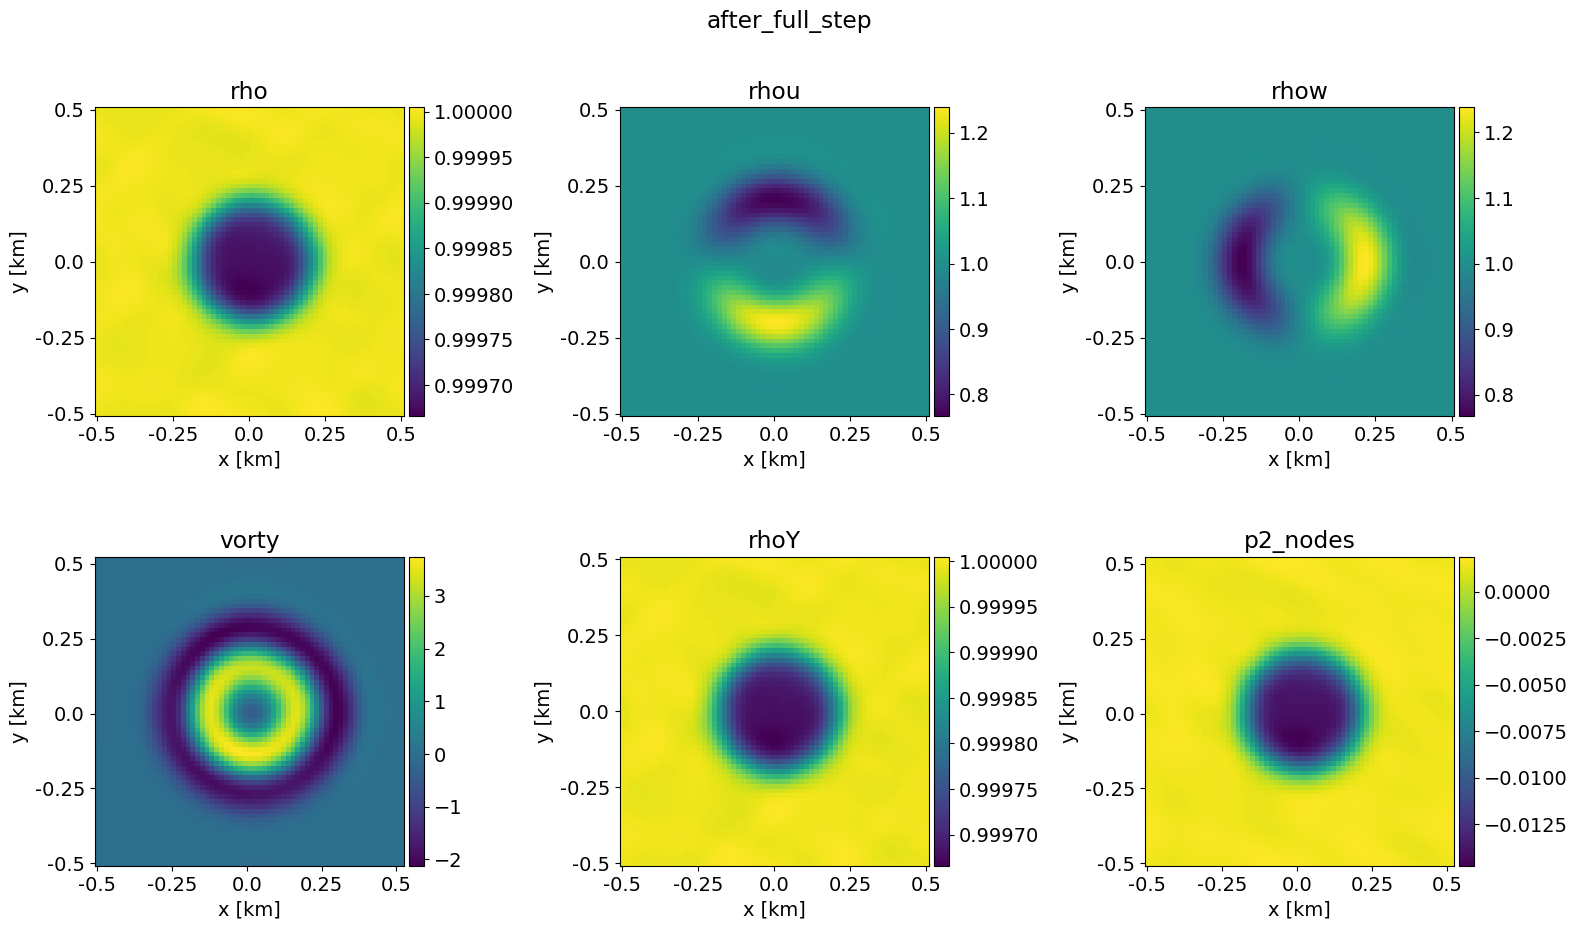

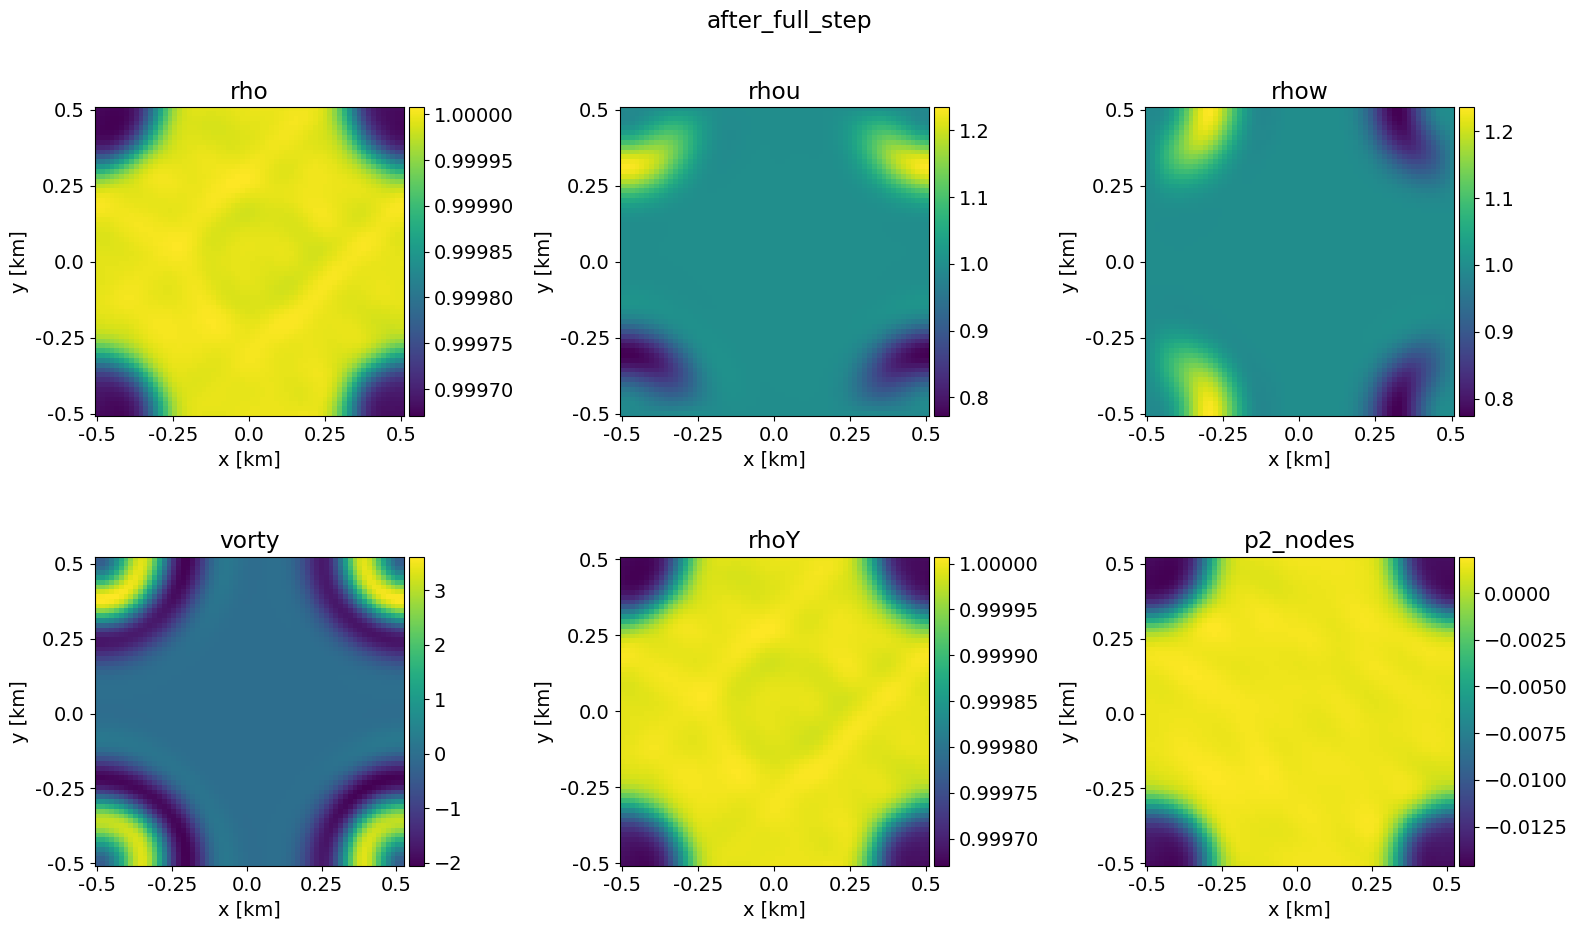

In [597]:
comp_sfx = 'comp_1.0_pps_tra_truth'
comp_sfx = 'comp_1.0_pps_tra_truth_ib'
# comp_sfx = 'comp_1.0_pps_tra_truth_ib'
# comp_sfx = 'psinc_1.0_pp_tra_truth'
# comp_sfx = 'debug'
# comp_sfx = 'comp_debug_ib'
# comp_sfx = 'psinc_debug'
# comp_sfx = 'noda_pp_psinc'
# comp_sfx = tc.cb_suffix(2,0, '%s' %(comp_sfx))
#54.0 -- 64.5

N = 1
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
# attributes = ['p2_nodes']
t_lbl = 'TIME'
# t_lbl = 'WINDOW_STEP'
slc = 0

if dvortex:
    times = np.array([0.0,1.0,2.0]) #* 1200.0
#     times = np.arange(0.0,11.0)
#     times = np.array([0.0,1.5,3.0]) * 72.0
else:
    times = [0.0,1.0,1.5]
#     times = np.array(times) / 10.0
    if t_lbl == 'WINDOW_STEP':
        times = [0.0,1.0,2.0]

class oo(object): pass
if 'comp' in comp_sfx:
    oo_comp = oo()
else:
    oo_pi = oo()
            
for tt,time in enumerate(times):
    print(time)
    if tt == 0:
        if t_lbl == 'WINDOW_STEP':
            tag_list = ['ic','after_swe_to_lake','after_lake_time_step','after_lake_to_swe']
        else:
            tag_list = ['ic']
    else:
        tag_list = [tags[9]]
    for tag in tag_list:
        arr_lst = []
        for atr_idx, attribute in enumerate(attributes):
            arr = tc.get_arr(path,time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0][:,slc,:]
            arr = arr.T

            if attribute == 'p2_nodes':
                print("%s %s: " %(tag,attribute), arr.max(), arr.min(), arr.max() - arr.min())
                arr_lst.append([arr, '%s' %attribute])
                print("mean = ", arr.mean())
            else:
                arr_lst.append([arr,attribute])

            if 'comp' in comp_sfx:
    #             print("comp:" ,comp_sfx)
                setattr(oo_comp,attribute,arr)
            else:
    #             print("pi", comp_sfx)
                setattr(oo_pi,attribute,arr)

            arr = [arr,attribute]

        pl = pt.plotter(arr_lst,ncols=3,figsize=(16,10),sharey=False)
        x_axs = [-0.5,-0.25,0.0,0.25,0.5]
        y_axs = [-0.5,-0.25,0.0,0.25,0.5]
        x_loc = np.linspace(0,Nx-1,5)
        y_loc = np.linspace(0,Nz-1,5)
        x_label = r'x [km]'
        y_label = r'y [km]'

        pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
        _ = pl.plot(aspect='equal',method='imshow',suptitle=tag)

# RMSE Plotter

(300, 64, 1, 64)
(300, 65, 2, 65)
(300, 64, 1, 64)
(300, 64, 1, 64)


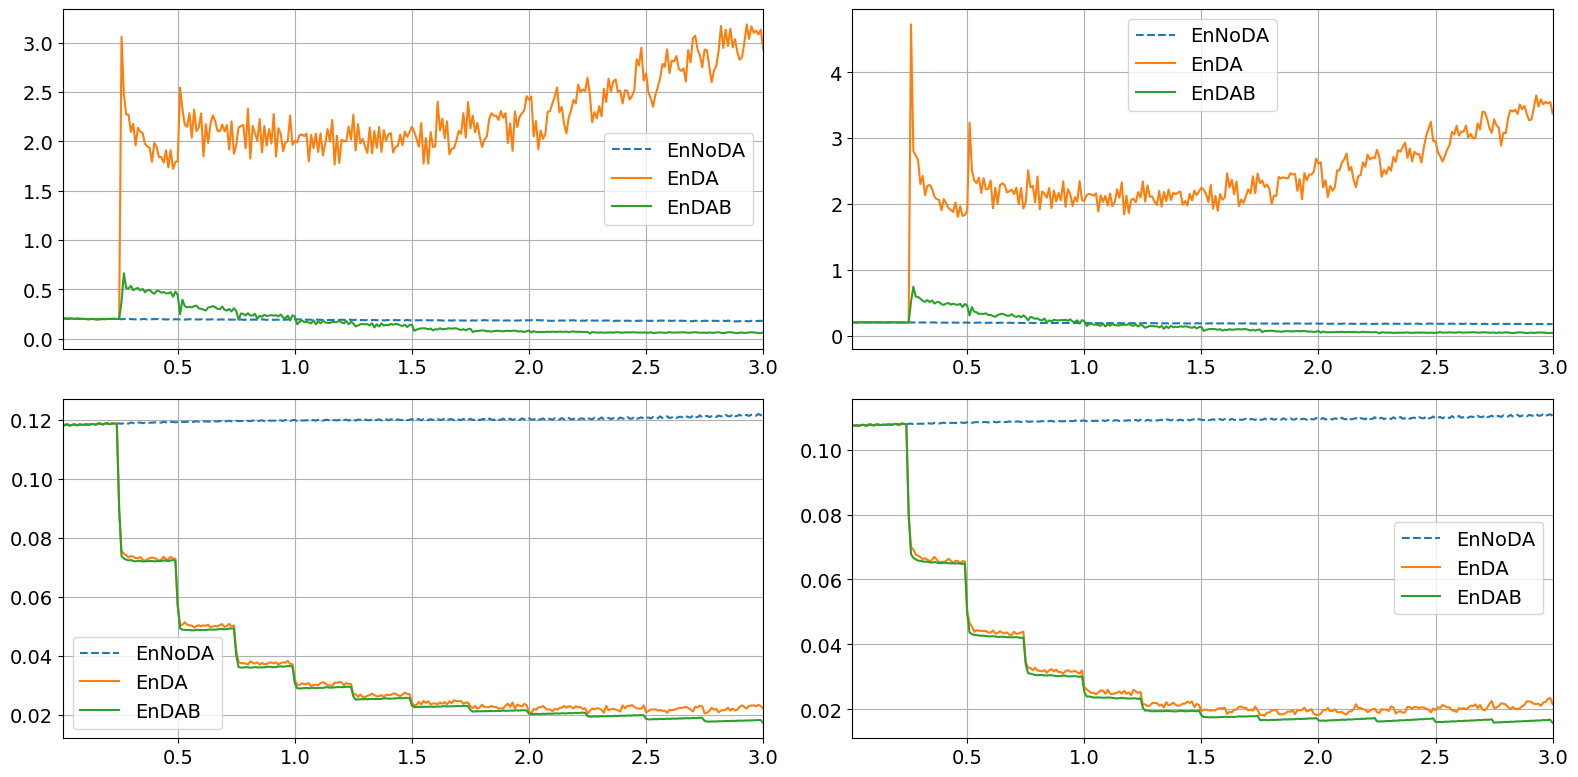

In [706]:
attributes = ['rho','p2_nodes','rhou','rhow']

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 64
Ny = 1
Nz = 64
test_case = 'debug'
test_case = None
if test_case == 'debug':
    et = 0.5
    N = 3
    times = np.arange(0.0,.51,0.01)[1:]
else:
    et = 3.0
    N = 10
    times = np.arange(0.0,3.01,0.01)[1:]
#     times = times[:10]

probe_idx = [32,32]

fn = 'effects_obs_covar_ensemble_spread'
title = ''

pl = pt.plotter_1d(figsize=(16,8),fontsize=14,ncols=2)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels()
attr_shorts = pt.short_labels()

rmse_type = 'probe'
rmse_type = 'spatial'
# rmse_type = 'mean'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    gt = 'n' if attribute == 'p2_nodes' else 'c'
    
    ens_noda_suffix = 'noda_pp'
    ens_noda_label = 'EnNoDA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'wdawloc_pp_rhou_rhow_tra_ib_0.25_nonorm'
    ens_1_label = r'EnDA'
    
#     ens_2_suffix = 'wdawloc_pps_rhou_rhow_tra_nonorm'
    ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_1_suffix))
    ens_2_label = r'EnDAB'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    print(ens_2.shape)
    
    obs = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth', label_type='TIME',avg=True, diff=diff)
    truth = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth_ib', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, truth, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, truth, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, truth, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg,grid_type=gt)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,truth,avg=avg,grid_type=gt)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,truth,avg=avg,grid_type=gt)
#         ax.set_ylabel('spatial and ensemble averaged RMSE')
#         plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    elif rmse_type == 'mean':
        diff_noda = tc.get_mean(ens_noda,gt)
        diff_ens_1 = tc.get_mean(ens_1,gt)
        diff_ens_2 = tc.get_mean(ens_2,gt)
        ref_mean = tc.get_mean(truth,gt)
        obs_mean = tc.get_mean(obs,gt)
        ax.set_ylabel('mean')
        plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends."oiiiiii9mjknn %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_noda, '--', label=ens_noda_label)
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
#     if rmse_type == 'mean':
#         ax.plot(times,ref_mean, label='ref_mean')
#         ax.plot(times,obs_mean, label='obs_mean')
#     ax.axvline(0.06, c='k')

#     ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
#     pl.fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
#     pl.fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')
#     pl.ax.set_xlabel('common xlabel')
#     pl.ax.set_ylabel('common ylabel')

#     
#     plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.0])
    
    prt.prtt('plt')
    
# add a big axes, hide frame
# ax0 = pl.fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
# ax0.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# ax0.grid(False)
# ax0.xlabel("time")
# ax0.ylabel("spatial and ensemble averaged RMSE")
# ax0.set_xlabel('time')
# ax0.set_ylabel('spatial and ensemble averaged RMSE')
# ax0.yaxis.set_label_coords(-0.04,0.5)

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
# plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.0])
plt.tight_layout()
plt.savefig('swe_rmse.pdf')
plt.show()

In [423]:
Nx = 128
Ny = 1
Nz = 128
et = 0.5

def load(Nx,Ny,et):
    base_fn = case
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

In [424]:
mean_arr = []
t_lbl = 'TIME'
attribute = 'p2_nodes'
times = np.arange(0.0,0.5,0.01)

sfx = 'comp_1.0_pps_tra_truth_ib'
N = 1
fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

for tt, time in enumerate(times):
    tag = 'ic' if tt == 0 else tags[9]
    arr = tc.get_arr(path,time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[:,slc,:]
    arr = arr.T
    mean_arr.append(arr.mean())

plt.figure()
plt.plot(mean_arr)
plt.show()
# c.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=False, diff=diff)

KeyError: "Unable to open object (object 'p2_nodes_ensemble_mem=0_0.030_after_full_step' doesn't exist)"